In [23]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller


In [2]:
# loading dataset from csv file
df = pd.read_csv("Dataset/FMCG_2022_2024.csv")

df.head(15)

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12
5,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-South,Carton,5.09,1,3,163,154,25
6,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,E-commerce,PL-North,Carton,8.58,0,2,140,156,7
7,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,E-commerce,PL-South,Carton,4.21,0,3,194,185,17
8,2022-01-22,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Carton,8.27,0,2,180,161,14
9,2022-01-22,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Carton,5.66,0,5,117,192,5


In [3]:
# checking dataset structure
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  str    
 1   sku              190757 non-null  str    
 2   brand            190757 non-null  str    
 3   segment          190757 non-null  str    
 4   category         190757 non-null  str    
 5   channel          190757 non-null  str    
 6   region           190757 non-null  str    
 7   pack_type        190757 non-null  str    
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), str(8)
memory usage: 20.4 MB


In [4]:
# converting date column to datetime
df["date"] = pd.to_datetime(df["date"])

In [5]:
print(df["date"].dtypes)

datetime64[us]


In [6]:
# sorting data by date
df = df.sort_values("date")


In [7]:
# grouping by date and summing units sold
daily_sales = df.groupby("date")["units_sold"].sum().reset_index()

daily_sales.head()


,date,units_sold
0,2022-01-21,85
1,2022-01-22,167
2,2022-01-23,197
3,2022-01-24,150
4,2022-01-25,171


In [8]:
# checking for null values in dataset
df.isnull().sum()


date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

In [9]:
# checking duplicate rows
df.duplicated().sum()

np.int64(0)

In [10]:
#EDA

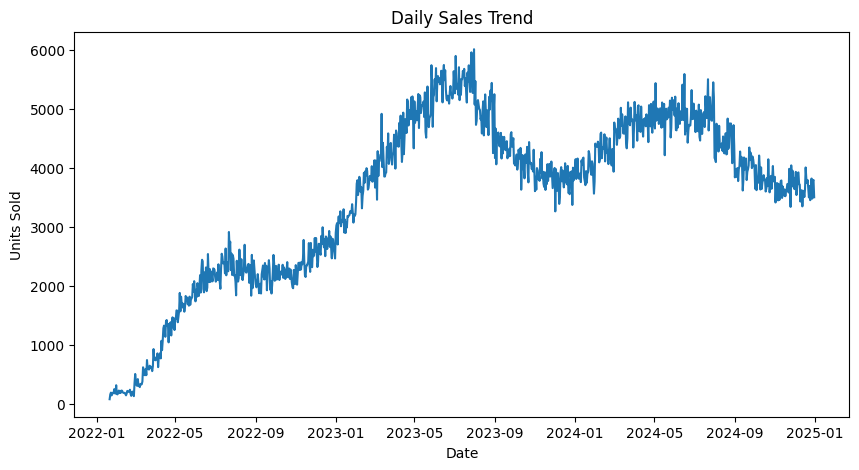

In [11]:
# plotting daily sales trend over time

plt.figure(figsize=(10,5))
plt.plot(daily_sales["date"], daily_sales["units_sold"])
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


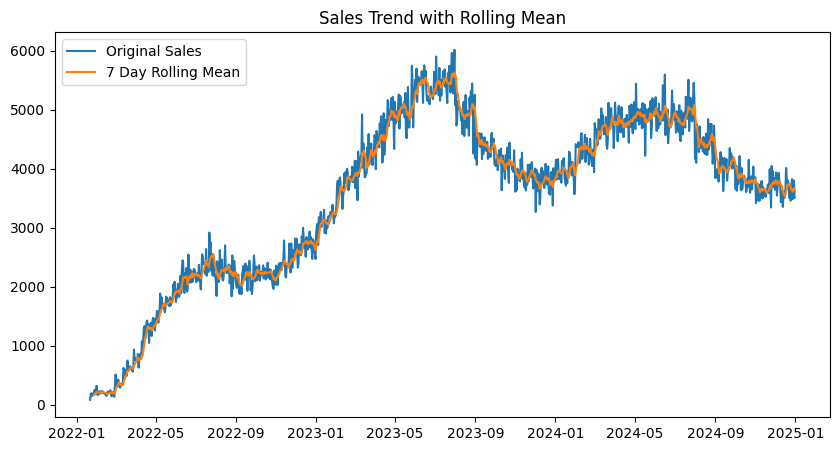

In [12]:
# calculating 7 day rolling average

daily_sales["rolling_mean"] = daily_sales["units_sold"].rolling(window=7).mean()

# original sales and rolling mean
plt.figure(figsize=(10,5))
plt.plot(daily_sales["date"], daily_sales["units_sold"], label="Original Sales")
plt.plot(daily_sales["date"], daily_sales["rolling_mean"], label="7 Day Rolling Mean")
plt.legend()
plt.title("Sales Trend with Rolling Mean")
plt.show()


I used rolling mean to smooth sales data and observe overall trend.

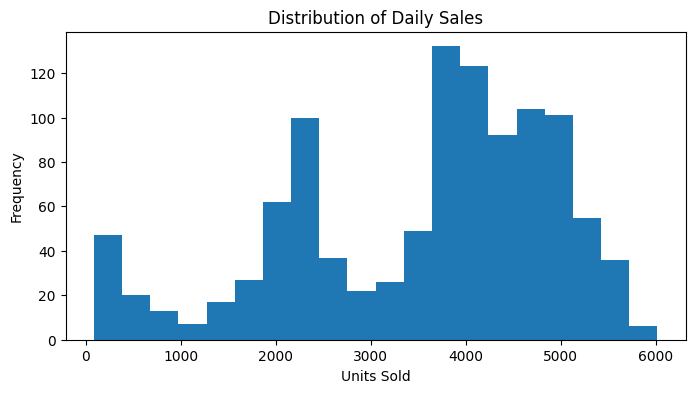

In [13]:
# distribution of daily sales
plt.figure(figsize=(8,4))
plt.hist(daily_sales["units_sold"], bins=20)
plt.title("Distribution of Daily Sales")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()


1. Plotted daily sales line graph to observe overall sales trend and ups and downs over time.
2. Used rolling mean to smooth daily fluctuations and understand the general sales trend more clearly.
3. Created sales distribution histogram to understand how daily sales values are spread.

In [14]:
#preparing data for prophet model
sales_df = daily_sales.rename(columns={
    "date": "ds",
    "units_sold": "y"
})

sales_df.head()


,ds,y,rolling_mean
0,2022-01-21,85,NaN
1,2022-01-22,167,NaN
2,2022-01-23,197,NaN
3,2022-01-24,150,NaN
4,2022-01-25,171,NaN


In [18]:
#apply prophet model now
model = Prophet()
model.fit(sales_df)
future = model.make_future_dataframe(periods=120)
future.tail()

forecast = model.predict(future)
forecast.head()

20:49:10 - cmdstanpy - INFO - Chain [1] start processing
20:49:10 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-21,142.829936,-471.608926,65.021819,142.829936,142.829936,-345.509557,-345.509557,-345.509557,-11.999308,-11.999308,-11.999308,-333.510250,-333.510250,-333.510250,0.0,0.0,0.0,-202.679621
1,2022-01-22,149.461715,-441.720122,89.294207,149.461715,149.461715,-329.308298,-329.308298,-329.308298,-11.314629,-11.314629,-11.314629,-317.993669,-317.993669,-317.993669,0.0,0.0,0.0,-179.846583
2,2022-01-23,156.093494,-396.586024,130.563452,156.093494,156.093494,-290.275809,-290.275809,-290.275809,12.356566,12.356566,12.356566,-302.632376,-302.632376,-302.632376,0.0,0.0,0.0,-134.182315
3,2022-01-24,162.725273,-353.930564,177.825210,162.725273,162.725273,-265.289926,-265.289926,-265.289926,22.172440,22.172440,22.172440,-287.462366,-287.462366,-287.462366,0.0,0.0,0.0,-102.564654
4,2022-01-25,169.357052,-389.367557,166.612738,169.357052,169.357052,-282.453260,-282.453260,-282.453260,-9.934127,-9.934127,-9.934127,-272.519133,-272.519133,-272.519133,0.0,0.0,0.0,-113.096208


In [ ]:
#Visualizing  Forecast

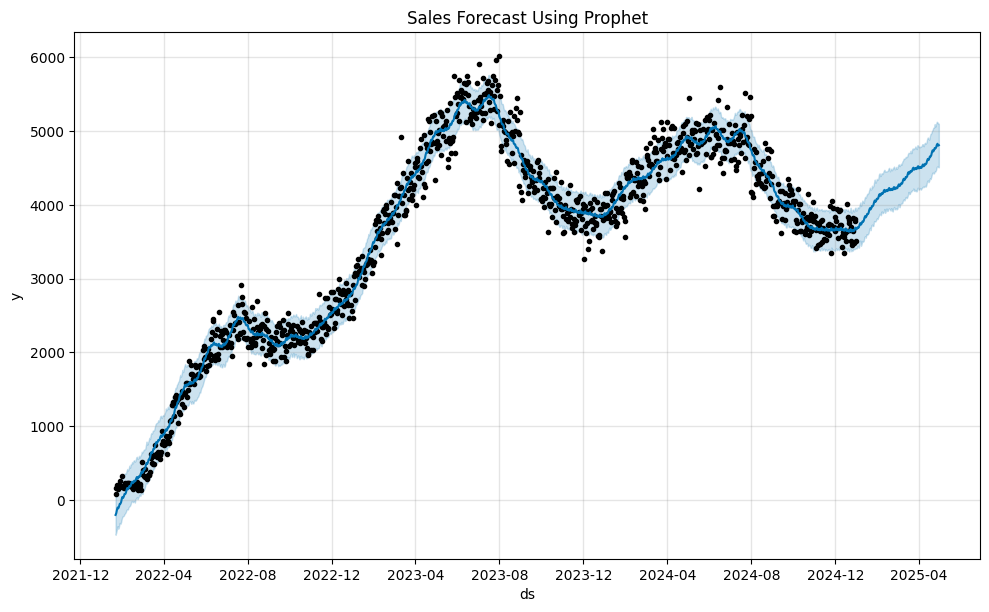

In [19]:
# forecasted sales
model.plot(forecast)
plt.title("Sales Forecast Using Prophet")
plt.show()


Black dots -actual sales
Blue line -forecasted sales
Light blue shaded area -prediction uncertainty
So we can see growth in sale from 2025 as per this Prophet model

In [ ]:
#comparing actual sales vs forecasted

In [20]:
# merging actual sales with forecasted values

merged = sales_df.merge(forecast[["ds", "yhat"]], on="ds", how="left")

merged.head()


,ds,y,rolling_mean,yhat
0,2022-01-21,85,NaN,-202.679621
1,2022-01-22,167,NaN,-179.846583
2,2022-01-23,197,NaN,-134.182315
3,2022-01-24,150,NaN,-102.564654
4,2022-01-25,171,NaN,-113.096208


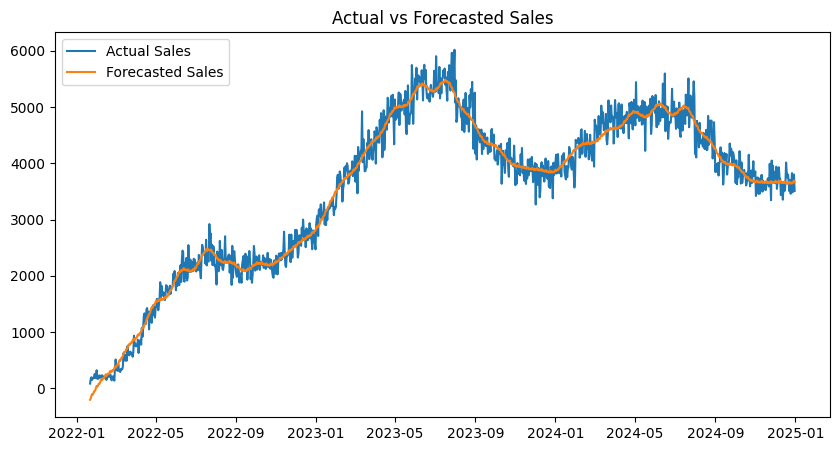

In [21]:
#actual sales vs forecasted sales
plt.figure(figsize=(10,5))
plt.plot(merged["ds"], merged["y"], label="Actual Sales")
plt.plot(merged["ds"], merged["yhat"], label="Forecasted Sales")
plt.legend()
plt.title("Actual vs Forecasted Sales")
plt.show()


**imp - Actual sales data was available only till January 2024 so comparison graph shows overlap till that period. Beyond that Prophet predicts future sales up to April 2025

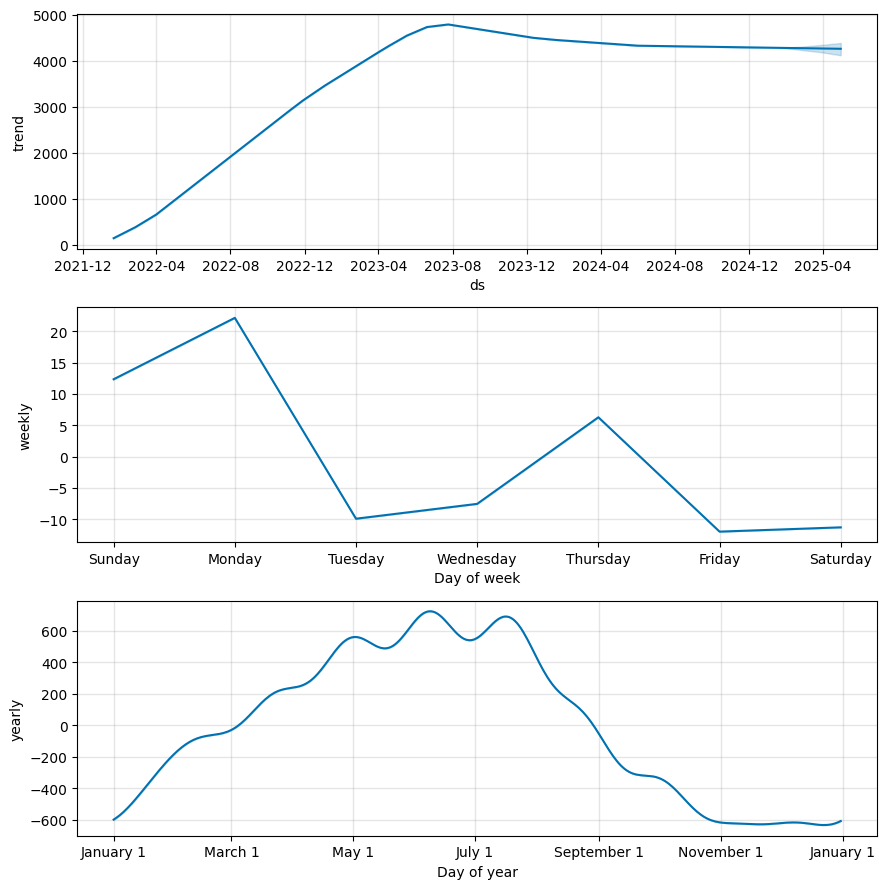

In [22]:
#trend and seasonal components
model.plot_components(forecast)
plt.show()

Analysis based on my observation:
1. Sales show an overall increasing trend over time.
2. Weekly seasonal patterns are visible where sales increase on certain days.
3. The forecasted values follow the overall trend of actual sales.
4. The Prophet model was able to capture both trend and seasonality effectively.
5. Forecast for next 120 days shows continued trend with seasonal fluctuations.

### Conclusion


#### In this project sales forecasting was performed using historical FMCG sales data. After cleaning and analyzing the data, Prophet time series model was applied to predict future sales for the next 120 days. The model captured overall sales trend and seasonal patterns effectively. Forecasted values were compared with actual sales and showed close alignment. This project helped in understanding time series forecasting and practical application of Prophet model for predicting future sales.